In [112]:
fig_size = 7

In [113]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import math

In [114]:
def poly(d):            # returns the polynomial p
    if d%4==1: # given by 0 1 1 0 -1 -1 0 ... (starting at 0)
        def p(x):
            # define it periodically 
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = 1
            else:
                val = -1

            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<=(d+1)/2:
                return val
            elif x == (d+3)/2:
                return val+1
            elif x == -(d+3)/2:
                return val-1
            elif x == (d+5)/2:
                return val + (d+2)
            elif x == -(d+5)/2:
                return val - (d+2)
            else:  # can only calculate for x in the "nice" range
                # print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None
    elif d%4==3: # given by 0 -1 -1 0 1 1 0 ... (starting at 0)
        def p(x):
            # define it periodically 
            if x%3 == 0:
                val = 0
            elif x%6 == 1 or x%6 == 2:
                val = -1
            else:
                val = 1
                
            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<=(d+1)/2:
                return val
            elif x == (d+3)/2:
                return val+1
            elif x == -(d+3)/2:
                return val-1
            elif x == (d+5)/2:
                return val + (d+2)
            elif x == -(d+5)/2:
                return val - (d+2)
            else: # can only calculate for x in the "nice" range
                # print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None
    elif d%4==2: # given by -1 -1 0 1 1 0 -1 ... (starting at -1/2)
        def p(x):
            x = x+1/2
            if int(x)!=x:       # we only define it on values in Z + 0.5
                return None
            # define it periodically 
            if x%3 == 2:
                val = 0
            elif x%6 == 3 or x%6 == 4:
                val = 1
            else:
                val = -1
            x=x-1/2
            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<int(d/2)+1:
                return val
            elif abs(x)<int(d/2)+2:
                return val+1
            elif abs(x)<int(d/2)+3:
                return val + (d+2)
            else:  # can only calculate for x in the "nice" range
                # print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None        # This is a flag telling us that we went outside of the nice box, and hence we should stop iterating
    elif d%4==0: # given by 1 1 0 -1 -1 0 1 ... (starting at -1/2)
        def p(x):
            x = x+1/2
            if int(x)!=x:       # we only define it on values in Z + 0.5
                return None
            # define it periodically 
            if x%3 == 2:
                val = 0
            elif x%6 == 3 or x%6 == 4:
                val = -1
            else:
                val = 1
            x=x-1/2
            # adjust the endpoints and return the appropriate value of p(x)
            if abs(x)<int(d/2)+1:
                return val
            elif abs(x)<int(d/2)+2:
                return val+1
            elif abs(x)<int(d/2)+3:
                return val + (d+2)
            else:  # can only calculate for x in the "nice" range
                # print("Error, cannot calculate for d=",d,"and x=",x,"!")
                return None        # This is a flag telling us that we went outside of the nice box, and hence we should stop iterating
    else:
        print("Warning, this value of d has not yet been implemented!")
        def p(x):       # returns the identity, so that the program doesn't crash
            return x
        
    return p

In [115]:
def actual_dyn_compress(d): # returns the polynomial that is actually dynamically compressing
    init_poly = poly(d)
    if d%2 == 1:
        def p(x):
            val = init_poly(x-3-int((d+1)/2))
            if val == None:
                return None
            else:
                return val - x + d + 6
    else:
        def p(x):
            val = init_poly(x-3-(d+1)/2)
            if val == None:
                return None
            else:
                return val + 2
    return p

In [116]:
def Henon(p,X):     # this is the Henon map of polynomial p: (x,y) -> (y, -x + p(y))
    result = p(X[1])
    if result == None:
        # print("Henon map failed at X=",X)
        return None # This is a (carried over) flag telling us that we went outside of the nice box, and hence we should stop iterating
    else:
        return [X[1],-X[0]+p(X[1])]

In [117]:
def trace_pt(p,X):          # follows the orbit of a point X under Henon map with polynomial p, 
                            # stopping either upon repeating a vertex or when we go outside the nice range
    orbit = []
    while X not in orbit:
        orbit.append(X)
        X = Henon(p,X)
        if X == None:
            return []               # if we iterate outside the d+2 box, we don't want to plot the orbit at all
    return orbit

In [118]:
def plot_orbit (orbit,col_index):         # plot the orbit
    # initialise the colours
    colours=["navy","mediumblue","slateblue","blueviolet","indigo","mediumorchid","thistle","plum","magenta","deeppink","crimson","lightpink","salmon","red","brown","maroon","saddlebrown","peru","sandybrown","lightsalmon","darkorange","goldenrod","gold","khaki","y","olive","olivedrab","yellowgreen","chartreuse", "limegreen", "g", "seagreen","mediumaquamarine","lightseagreen","teal","c","aqua","deepskyblue","lightskyblue","steelblue","gray"]
    colours = [colours[2*i%len(colours)] for i in range(0,len(colours))] # shuffle so that they're not too close
    col = colours[col_index % len(colours)]         # pick the corresponding colour

    if len(orbit) == 1:     # this must be a fixed point
        plt.plot(orbit[0][0],orbit[0][1],marker=r'$\circlearrowleft$',ms=20,color = col)
    elif len(orbit)>1:
        orbit.append(orbit[0])      # force a cycle
        xs = [orbit[i][0] for i in range(len(orbit)-1)]
        ys = [orbit[i][1] for i in range(len(orbit)-1)]
        plt.scatter(xs,ys,color = col)              # plots the individual vertices

        for k in range(len(orbit)-1):
            plt.arrow(orbit[k][0],orbit[k][1],orbit[k+1][0]-orbit[k][0],orbit[k+1][1]-orbit[k][1],width=.01,color = col,alpha =0.3)         # plots an arrow between two consecutive iterates

In [119]:
def get_box_range(d,poly):
    return [min([x for x in range(-2*d,2*d) if poly(x)!=None]),max([x for x in range(-2*d,2*d) if poly(x)!=None])]

In [120]:
def find_longest_cycle_length(p,d): # find the length of the longest cycle in an orbit p.
                                                             # can easily be modified to give you the actual cycle too.
    found_points = []
    largest_orbit_size = 0
    check_range = get_box_range(d,p)
    for x_tocheck in range(-check_range[0],check_range[1]):
        for y_tocheck in range(-check_range[0],check_range[1]):
            if [x_tocheck,y_tocheck] in found_points:
                continue
            else:
                orbit = trace_pt(p,[x_tocheck,y_tocheck])
                if len(orbit) == 0:
                    continue
                #print(orbit)
                found_points.extend(orbit)
                if len(orbit)> largest_orbit_size:
                    #print(orbit)
                    largest_orbit_size = len(orbit)
    return largest_orbit_size


In [121]:
def create_henon_graphic(p,d,reference_box=None):
    check_range = get_box_range(d,p)
    found_points = []        # store all the vertices whose orbits we've already plotted
    plt.figure(figsize = (fig_size,fig_size))

    if reference_box!=None: # Draw the reference box
        xs = [reference_box[0],reference_box[0],reference_box[1],reference_box[1],reference_box[0]]     
        ys = [reference_box[0],reference_box[1],reference_box[1],reference_box[0],reference_box[0]]
        plt.plot(xs,ys,"--",color = "grey")
    # plt.grid(which="both")
    # plt.xticks([i for i in range(-box_range-1,box_range+1)])
    # plt.yticks([i for i in range(-box_range-1,box_range+1)])

    count = 0
    for i in range(check_range[0],check_range[1]+1):    
        for j in range(check_range[0],check_range[1]+1):        # iterate through all the points
            if [i,j] in found_points: continue            # only iterate if we haven't plotted already, to reduce computation
            
            orbit = trace_pt(p,[i,j])     # get the orbit by tracing the point
            if len(orbit) == 0: continue
            # print(orbit)
            found_points.extend(orbit)          # add each iterate to the list of plotted vertices
            plot_orbit(orbit,count)       # plot the orbit    
            count += 1                   # for count-based colour styles

    # plot formatting:

    plt.axis('equal')
    plt.show()
    plt.close()


In [122]:
def shift_poly_in_x(shift,poly):        # shifts the value taken by distance "shift" to the right
    def new_poly(x):
        return poly(x-shift)
    return new_poly

In [125]:
def shift_poly_in_y(shift,poly):        # translates the value of the polynomial by p(x) -> p(x) + shift
    def new_poly(x):
        return poly(x) + shift
    return new_poly

In [ ]:
def poly_minus_x(p):
    def new_poly(x):
        if p(x) == None:
            return None
        return p(x)-x
    return new_poly

ODD d:

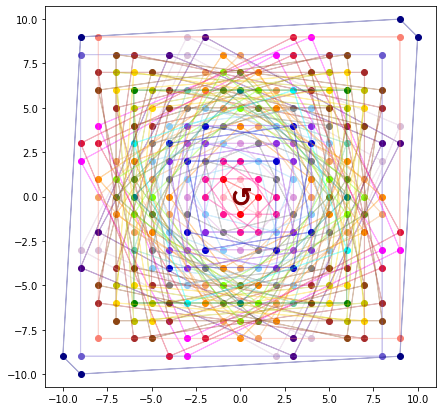

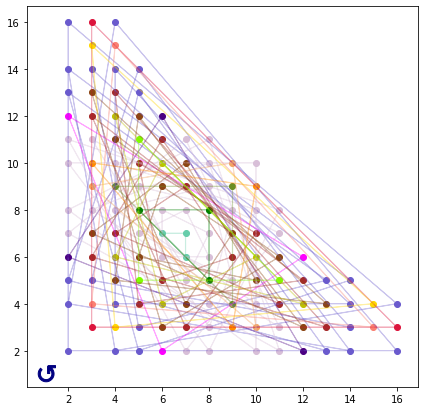

In [124]:
d = 15
init_poly = poly(d)
create_henon_graphic(init_poly,d)
dyn_poly = actual_dyn_compress(d)
create_henon_graphic(dyn_poly,d)

EVEN d:

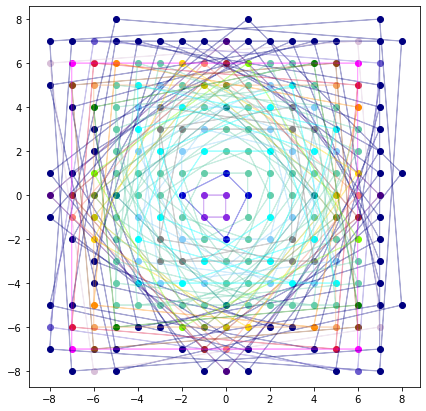

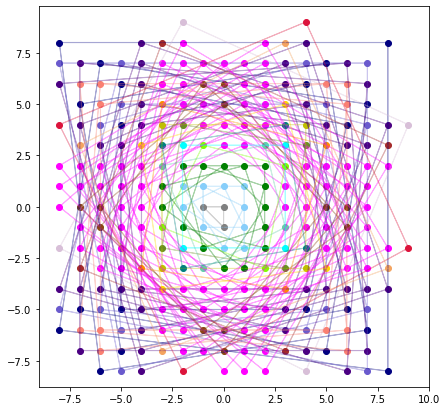

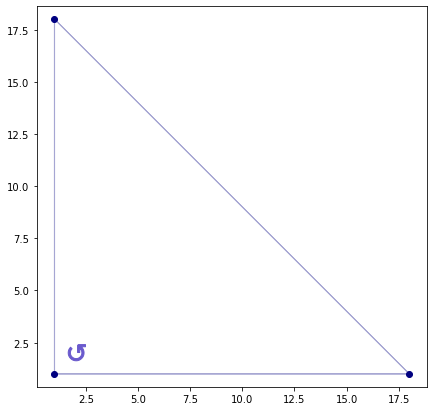

In [123]:
d = 14
init_poly = poly(d)
left_shift = shift_poly_in_x(-0.5,init_poly)
create_henon_graphic(left_shift,d)
right_shift = shift_poly_in_x(0.5,init_poly)
create_henon_graphic(right_shift,d)
dyn_poly = actual_dyn_compress(d)
create_henon_graphic(dyn_poly,d)